<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/Australia_Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Dealing with missing values on Rain in Australia datasets
---
## Description:
The [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

## Objective:
The goal is to solve the problem of missing data.

## Downloading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

od.version()

'0.1.20'

In [ ]:
url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
od.download(url)

100%|██████████| 3.83M/3.83M [00:00<00:00, 59.9MB/s]

In [ ]:
import os

data_dir = 'weather-dataset-rattle-package'

os.listdir(data_dir)
train_csv = data_dir + '/weatherAUS.csv'

In [ ]:
raw_df = pd.read_csv(train_csv)
raw_df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
raw_df.shape

(145460, 23)

In [ ]:
raw_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
raw_df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [ ]:
raw_df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
raw_df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [ ]:
raw_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

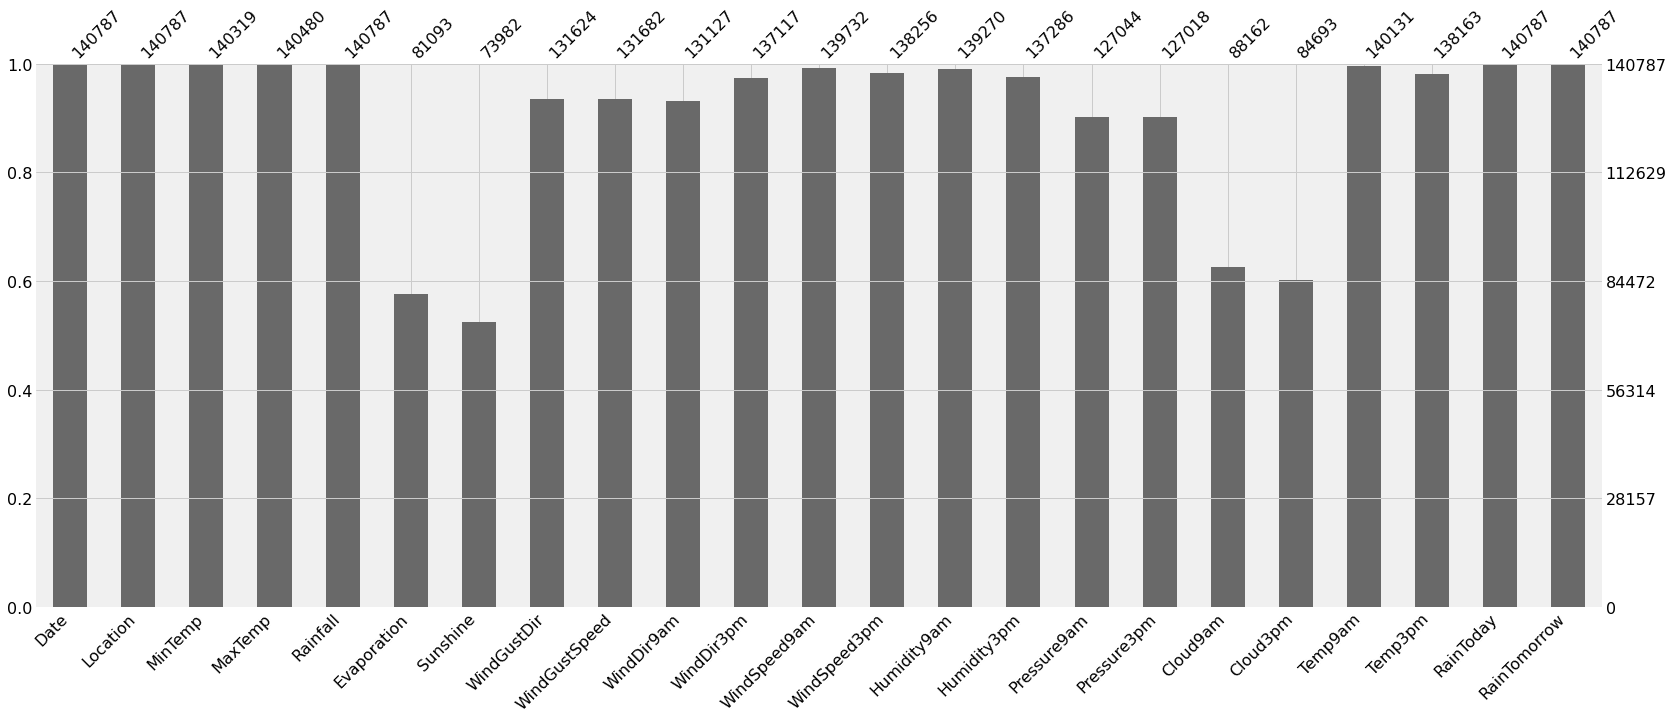

In [ ]:
ax = msno.bar(raw_df)

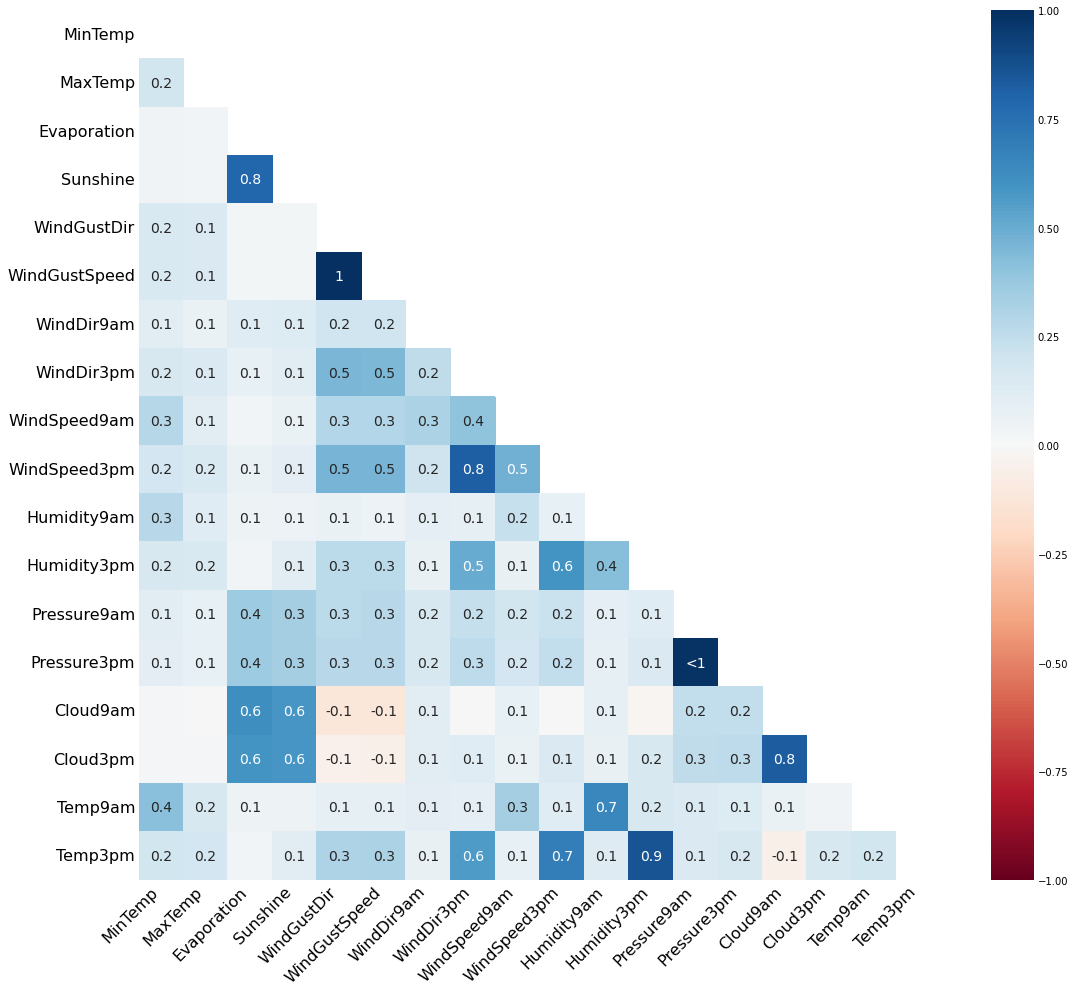

In [ ]:
ax = msno.heatmap(raw_df, figsize=(16,16))

- RainToday - Rainfall - corr : 1
- Sunshine - Evaporation - corr : 0.8
- WindGustSpeed - WindGustDir - corr : < 1
- WindSpeed3m -  WindDir3am - corr: 0.8
- Temp9am - Humidity9pm - corr: 0.8
- Temp3am - Humidity3am - corr: 0.9
- Pressure3am - Pressure9am - corr: < 1
- cloud3pm -  cloud9pm - corr: .8

In [16]:
from sklearn.compose import make_column_selector as selector
categorical_column = selector(dtype_include='object')(raw_df)
numerical_column = selector(dtype_exclude='object')(raw_df)

In [17]:
categorical_column

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [18]:
numerical_column

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [19]:
categorical_column = ['Date', 'Location','WindGustDir', 'WindDir9am', 
                      'WindDir3pm',  'RainToday']
numerical_column = ['MinTemp', 'MaxTemp', 'Sunshine', 'WindSpeed9am', 
                    'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud3pm' ]

target_column = 'RainTomorrow'
new_raw_df = raw_df[categorical_column + numerical_column + [target_column]]
new_raw_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Sunshine,WindSpeed9am,Pressure3pm,Temp9am,Temp3pm,Cloud3pm,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,13.4,22.9,NaN,20.0,1007.1,16.9,21.8,NaN,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,7.4,25.1,NaN,4.0,1007.8,17.2,24.3,NaN,No
2,2008-12-03,Albury,WSW,W,WSW,No,12.9,25.7,NaN,19.0,1008.7,21.0,23.2,2.0,No
3,2008-12-04,Albury,NE,SE,E,No,9.2,28.0,NaN,11.0,1012.8,18.1,26.5,NaN,No
4,2008-12-05,Albury,W,ENE,NW,No,17.5,32.3,NaN,7.0,1006.0,17.8,29.7,8.0,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4881ed850>,
      dtype=object)

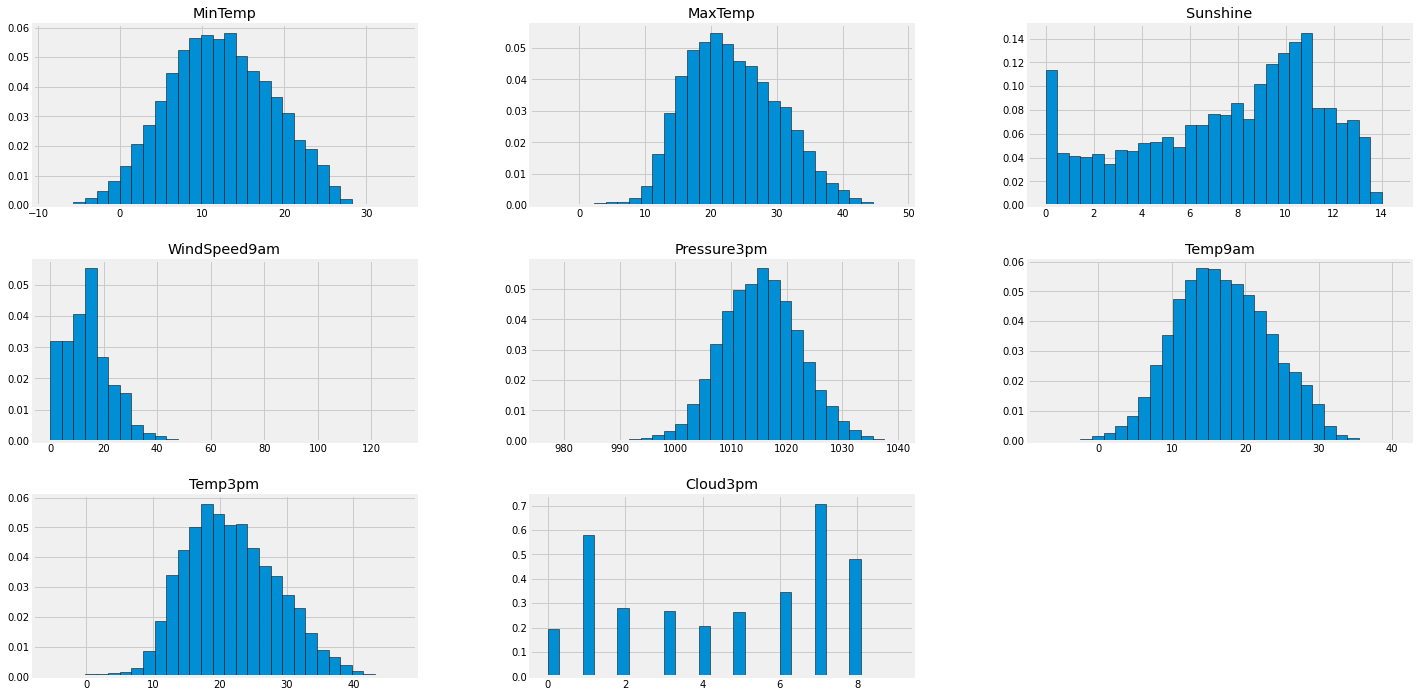

In [20]:
new_raw_df.hist(figsize=(22, 12), bins=30, edgecolor="black", density=True)

Text(0.5, 1.0, 'Class distribution')

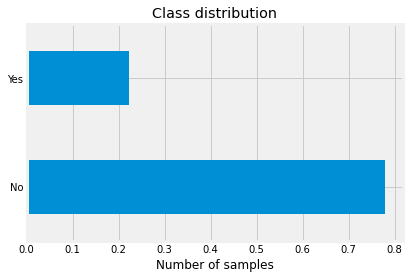

In [21]:
new_raw_df.RainTomorrow.value_counts(normalize=True).plot.barh()
plt.xlabel('Number of samples')
plt.title('Class distribution')

In [22]:
new_raw_df.RainTomorrow.value_counts(dropna=False, normalize=True) * 100

No     77.838153
Yes    22.161847
Name: RainTomorrow, dtype: float64

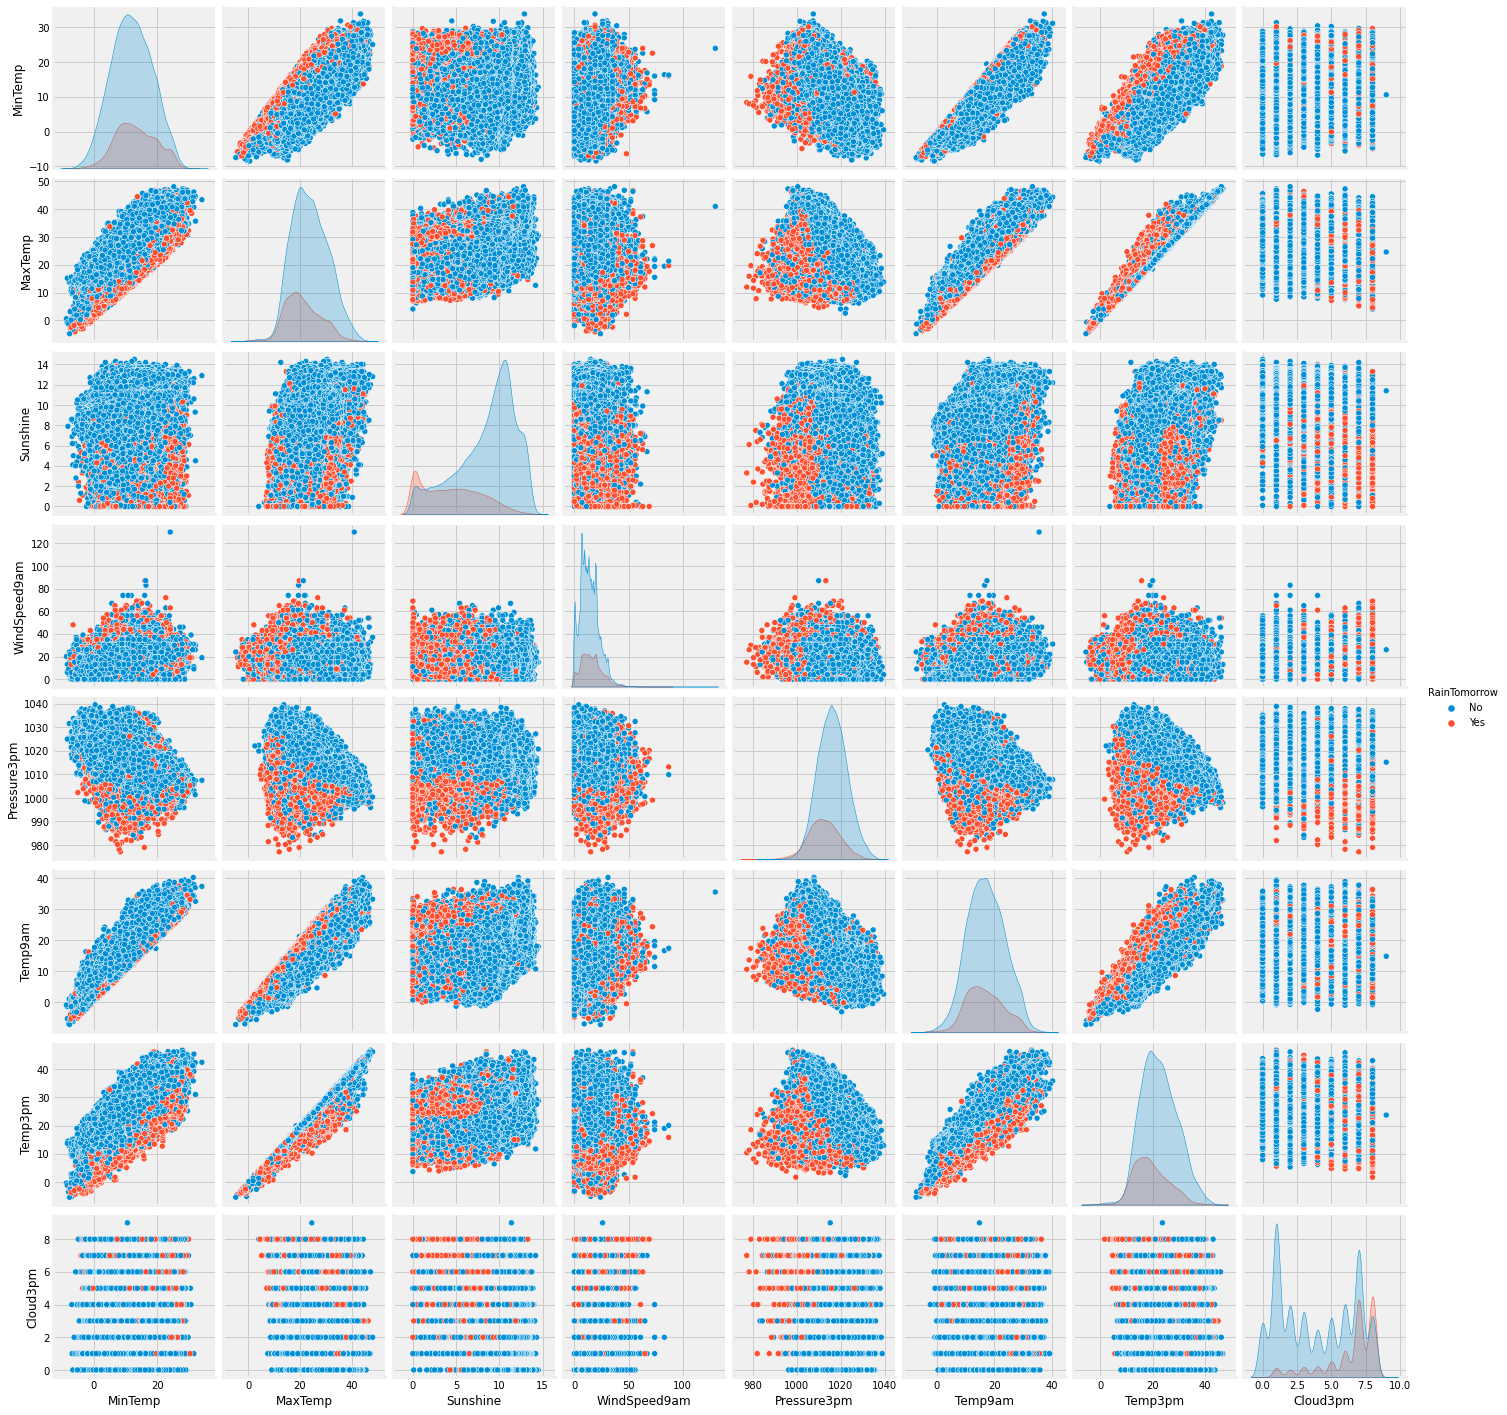

In [23]:
sns.pairplot(new_raw_df[1:], hue='RainTomorrow')

In [ ]:
bar_col = sns.color_palette()[5]
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(new_raw_df.Date).dt.year,
              color=bar_col);

In [ ]:
year = pd.to_datetime(new_raw_df.Date).dt.year

In [ ]:
print(numerical_column)
print(categorical_column)

In [ ]:
# raw_df = (
#     raw_df.assign(
#         MinTemp = raw_df.MinTemp.astype(np.int8),
#         MaxTemp = raw_df.MaxTemp.astype(np.int8),
#         Rainfall = raw_df.Rainfall.astype(np.int16),
#         Evaporation = raw_df.Evaporation.astype(np.int16),
#         Sunshine = raw_df.Sunshine.astype(np.int8),
#         WindGustSpeed = raw_df.WindGustSpeed.astype(np.int16),
#         WindSpeed9am = raw_df.WindSpeed9am.astype(np.int16),
#         WindSpeed3pm = raw_df.WindSpeed3pm.astype(np.int8),
#         Humidity9am = raw_df.Humidity9am.astype(np.int8),
#         Humidity3pm = raw_df.Humidity3pm.astype(np.int8),
#         Pressure9am = raw_df.Pressure9am.astype(np.int16),
#         Pressure3pm = raw_df.Pressure3pm.astype(np.int16),
#         Cloud9am = raw_df.Cloud9am.astype(np.int8),
#         Cloud3pm = raw_df.Cloud3pm.astype(np.int8),
#         Temp9am = raw_df.Temp9am.astype(np.int8),
#         Temp3pm = raw_df.Temp3pm.astype(np.int8),
#     )
# )

# raw_df.info(memory_usage='deep')